Customer ID: 1,Customer type: 0 Demand: 0
Customer ID: 2,Customer type: 1 Demand: 33.0
Customer ID: 3,Customer type: 1 Demand: 15.0
Customer ID: 4,Customer type: 1 Demand: 10.0
Customer ID: 5,Customer type: 1 Demand: 40.0
Customer ID: 6,Customer type: 1 Demand: 15.0
Customer ID: 7,Customer type: 1 Demand: 5.0
Customer ID: 8,Customer type: 1 Demand: 77.0
Customer ID: 9,Customer type: 1 Demand: 435.0
Customer ID: 10,Customer type: 1 Demand: 165.0
Customer ID: 11,Customer type: 1 Demand: 120.0
Customer ID: 12,Customer type: 1 Demand: 65.0
Customer ID: 13,Customer type: 1 Demand: 23.0
Customer ID: 14,Customer type: 1 Demand: 18.0
Customer ID: 15,Customer type: 1 Demand: 550.0
Customer ID: 16,Customer type: 1 Demand: 78.0
Customer ID: 17,Customer type: 1 Demand: 627.0
Customer ID: 18,Customer type: 1 Demand: 9.0
Customer ID: 19,Customer type: 1 Demand: 96.0
Customer ID: 20,Customer type: 1 Demand: 116.0
Customer ID: 21,Customer type: 1 Demand: 116.0
Customer ID: 22,Customer type: 1 Demand: 

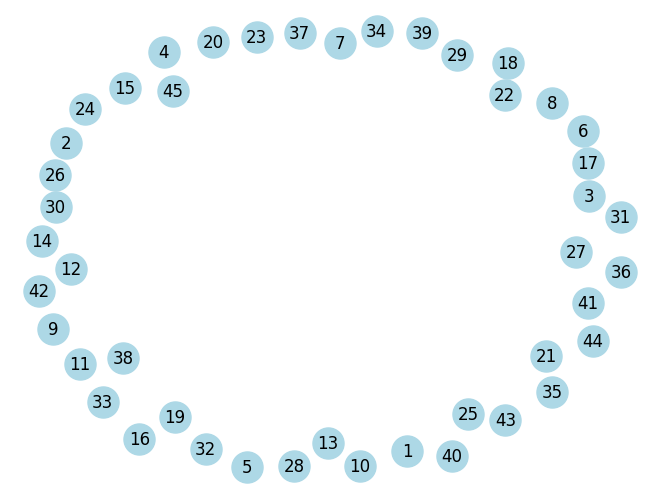

In [46]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
path = '../data/fisher-1994-set-f/F-n045-k4.xml'
def transfer_xml_to_nxgraph(path):
    # Load the VRP-REP XML file
    tree = ET.parse(path)
    root = tree.getroot()
    G = nx.DiGraph()

    #for elem in root.iter():
    #    print(f'Element: {elem.tag}, Attributes: {elem.attrib}')
    #    if elem.text is not None:
    #        print(f'  Text: {elem.text.strip()}')

    # Print specific elements of interest
    for customer in root.findall('./network/nodes/node'):
        id = customer.get('id')
        cx = customer.find('cx').text  # Get the text content of <cx>
        cy = customer.find('cy').text 
        pos = (cx,cy)
        type = customer.get('type')
        if(id !='1'):
            demand_item = root.find(f"./requests/request[@node='{id}']")
            demand_sin = demand_item.find('quantity').text
        else:
            demand_sin = 0
        G.add_node(id,pos=pos,demand = demand_sin)
        print(f'Customer ID: {id},Customer type: {type} Demand: {demand_sin}')
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)

    # Display the plot
    plt.show()
    return G
transfer_xml_to_nxgraph(path)